Plotting precipitation time series for Zimbabwe...


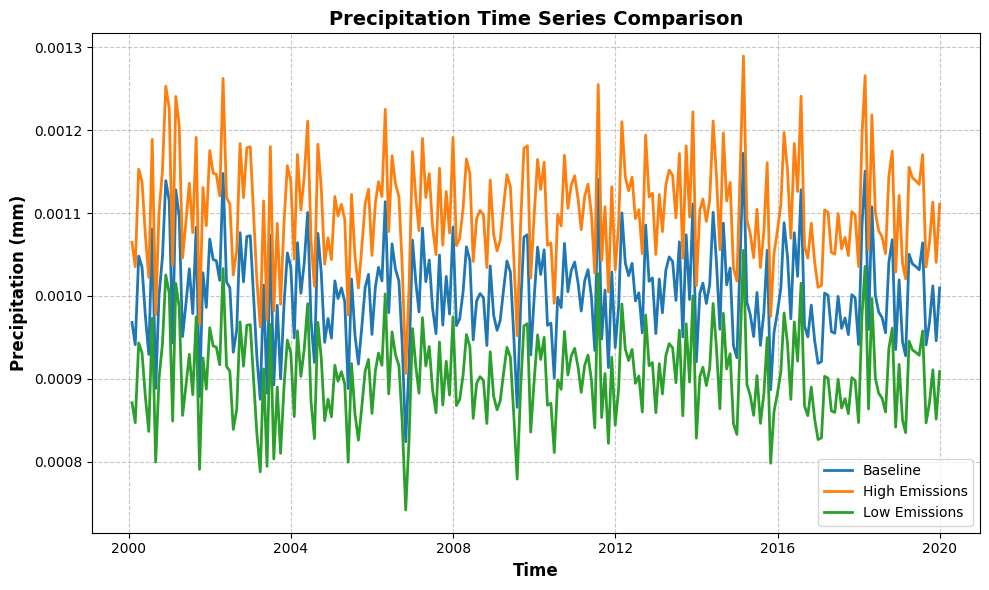

Plotting precipitation time series for Harare (closest grid point)...


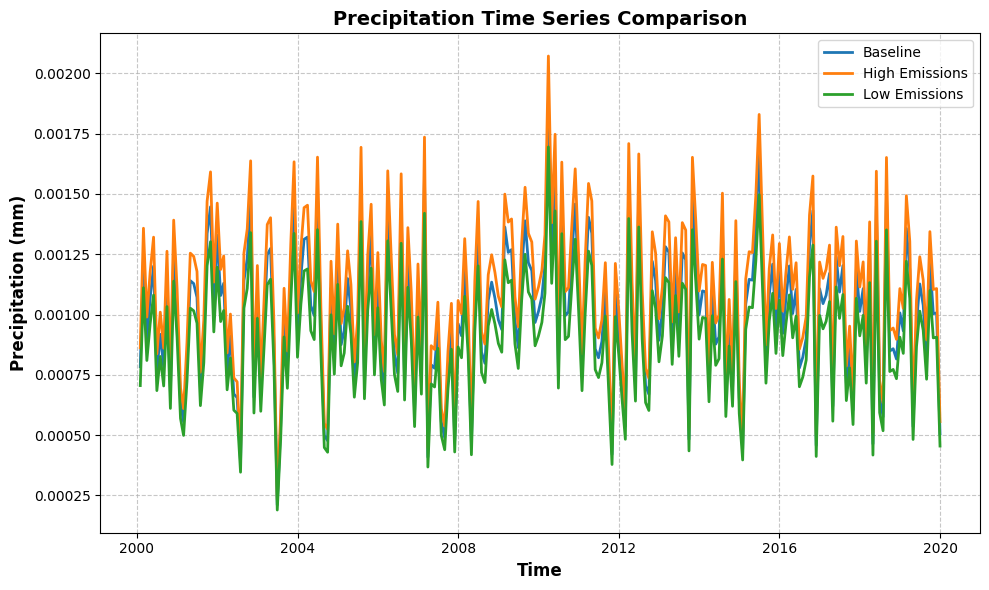

Plotting precipitation time series with trend lines...


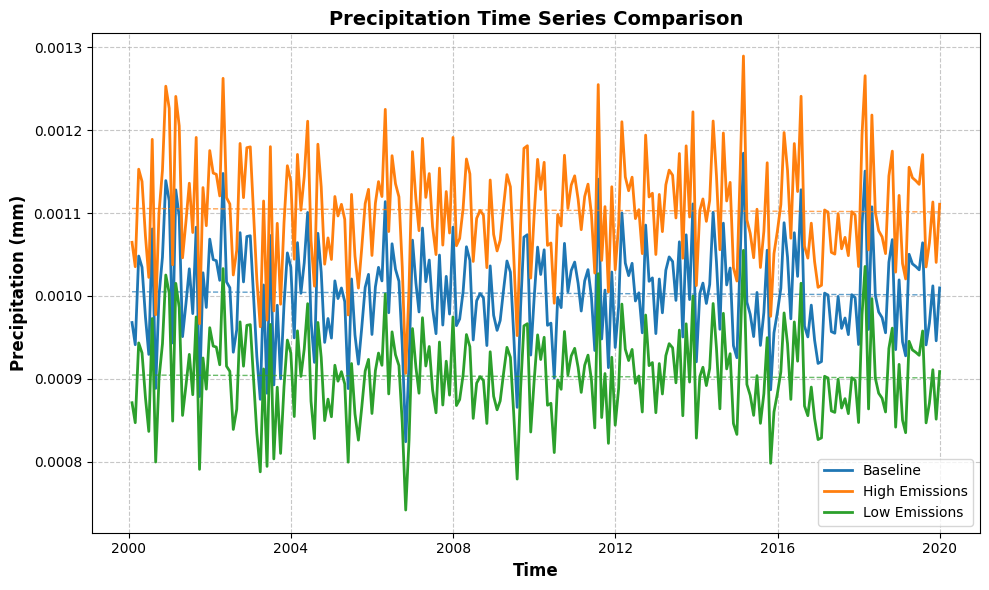

Analysis complete!


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats
import pandas as pd

def plot_time_series(ds_baseline, datasets, scenarios, region_slice=None, lat_idx=None, lon_idx=None, calculate_trend=False):
    """
    Plot time series of precipitation for different scenarios.
    
    Parameters:
    -----------
    ds_baseline : xarray.Dataset
        Baseline dataset
    datasets : dict
        Dictionary of datasets for different scenarios
    scenarios : dict
        Dictionary with scenario information
    region_slice : tuple, optional
        Tuple of slices for lat and lon to define a region
    lat_idx, lon_idx : int, optional
        Indices for a specific grid point
    calculate_trend : bool, optional
        Whether to calculate and display trend lines
    """
    # Define colors for different scenarios
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    # Create a figure
    fig = plt.figure(figsize=(10, 6))
    
    # Plot each scenario
    for i, (scenario_id, ds) in enumerate(datasets.items()):
        if lat_idx is not None and lon_idx is not None:
            # Single point
            scenario_ts = ds.pr.sel(lat=ds.lat[lat_idx], lon=ds.lon[lon_idx], method='nearest')
        elif region_slice is not None:
            # Regional average
            lat_slice, lon_slice = region_slice
            scenario_ts = ds.pr.isel(lat=lat_slice, lon=lon_slice).mean(dim=['lat', 'lon'])
        else:
            # Global average
            scenario_ts = ds.pr.mean(dim=['lat', 'lon'])
        
        # Convert to numpy arrays
        scenario_time = ds.time.values
        scenario_values = scenario_ts.values
        
        plt.plot(scenario_time, scenario_values, label=scenarios[scenario_id]['name'], 
                 color=colors[i % len(colors)], linewidth=2)
        
        # Calculate trend if requested
        if calculate_trend:
            # Convert time to numeric format for regression
            numeric_time = np.arange(len(scenario_time))
            
            # Calculate linear regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(numeric_time, scenario_values)
            
            # Create trend line
            trend = intercept + slope * numeric_time
            
            # Plot trend line
            plt.plot(scenario_time, trend, '--', color=colors[i % len(colors)], 
                     linewidth=1, alpha=0.7)
    
    # Add labels and title
    plt.xlabel('Time', fontsize=12, fontweight='bold')
    plt.ylabel('Precipitation (mm)', fontsize=12, fontweight='bold')
    plt.title('Precipitation Time Series Comparison', fontsize=14, fontweight='bold')
    
    # Format the plot
    plt.legend(fontsize=10, frameon=True)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    return fig

# Example data setup (you would replace this with your actual data)
# Create some sample data for demonstration
def create_sample_data():
    # Create time dimension
    times = pd.date_range('2000-01-01', periods=240, freq='M')
    
    # Create lat and lon dimensions
    lats = np.linspace(-20, -15, 10)
    lons = np.linspace(28, 33, 10)
    
    # Create sample precipitation data with some random variation
    np.random.seed(42)
    pr_baseline = np.random.normal(0.001, 0.0003, size=(len(times), len(lats), len(lons)))
    
    # Create xarray dataset
    ds_baseline = xr.Dataset(
        data_vars=dict(
            pr=(['time', 'lat', 'lon'], pr_baseline)
        ),
        coords=dict(
            time=times,
            lat=lats,
            lon=lons
        )
    )
    
    # Create scenario datasets with slight variations
    datasets = {
        'baseline': ds_baseline,
        'scenario1': ds_baseline.copy(deep=True),
        'scenario2': ds_baseline.copy(deep=True)
    }
    
    # Add some trend to scenarios
    datasets['scenario1']['pr'] = datasets['scenario1']['pr'] * 1.1
    datasets['scenario2']['pr'] = datasets['scenario2']['pr'] * 0.9
    
    # Define scenario information
    scenarios = {
        'baseline': {'name': 'Baseline'},
        'scenario1': {'name': 'High Emissions'},
        'scenario2': {'name': 'Low Emissions'}
    }
    
    # Define Zimbabwe region slice (example)
    zimbabwe_slice = (slice(0, 5), slice(0, 5))  # Just an example, adjust as needed
    
    return ds_baseline, datasets, scenarios, zimbabwe_slice

# Create sample data
ds_baseline, datasets, scenarios, zimbabwe_slice = create_sample_data()

# Plot time series for Zimbabwe
print("Plotting precipitation time series for Zimbabwe...")
zimbabwe_plot = plot_time_series(ds_baseline, datasets, scenarios, region_slice=zimbabwe_slice)

# Optional: Plot for a specific location (e.g., Harare: approximately -17.8, 31.0)
# Find the closest grid point to Harare
harare_lat, harare_lon = -17.8, 31.0
lat_idx = np.abs(ds_baseline.lat.values - harare_lat).argmin()
lon_idx = np.abs(ds_baseline.lon.values - harare_lon).argmin()

print(f"Plotting precipitation time series for Harare (closest grid point)...")
harare_plot = plot_time_series(ds_baseline, datasets, scenarios, lat_idx=lat_idx, lon_idx=lon_idx)

# Plot with trend lines
print("Plotting precipitation time series with trend lines...")
trend_plot = plot_time_series(ds_baseline, datasets, scenarios, region_slice=zimbabwe_slice, calculate_trend=True)

print("Analysis complete!")

In [27]:
!pip install cmocean

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import cmocean

def create_sample_temperature_data():
    """Create sample temperature data for Zimbabwe and surrounding areas."""
    # Create time dimension
    times = pd.date_range('2000-01-01', periods=240, freq='M')
    
    # Create lat and lon dimensions for Zimbabwe and surrounding areas
    # Zimbabwe is roughly between -22°S to -15°N and 25°E to 33°E
    # We'll extend the area a bit to show surrounding regions
    lats = np.linspace(-25, -12, 30)
    lons = np.linspace(22, 36, 30)
    
    # Create sample temperature data with seasonal cycle and spatial variation
    np.random.seed(42)
    
    # Base temperature field with spatial variation (cooler in highlands, warmer in lowlands)
    temp_base = np.zeros((len(lats), len(lons)))
    for i, lat in enumerate(lats):
        for j, lon in enumerate(lons):
            # Simulate Zimbabwe's topography effect on temperature
            # Higher elevations in eastern Zimbabwe
            if lon > 30:
                temp_base[i, j] = 22 - (lon - 30) * 2  # Cooler in eastern highlands
            else:
                temp_base[i, j] = 24  # Warmer in western lowlands
    
    # Create time series with seasonal cycle
    temp_baseline = np.zeros((len(times), len(lats), len(lons)))
    for t, time in enumerate(times):
        month = time.month
        # Seasonal cycle: warmer in Oct-Feb (summer), cooler in Jun-Aug (winter)
        seasonal_factor = np.cos((month - 1) / 12 * 2 * np.pi)
        # Winter is about 10°C cooler than summer
        temp_baseline[t] = temp_base - seasonal_factor * 5
        # Add some random noise
        temp_baseline[t] += np.random.normal(0, 1, size=(len(lats), len(lons)))
    
    # Create xarray dataset
    ds_baseline = xr.Dataset(
        data_vars=dict(
            tas=(['time', 'lat', 'lon'], temp_baseline, 
                 {'units': 'degrees_C', 'long_name': 'Surface Air Temperature'})
        ),
        coords=dict(
            time=times,
            lat=lats,
            lon=lons
        )
    )
    
    # Create scenario datasets with temperature changes
    # RCP2.6 (low emissions): ~1°C increase by 2100
    # RCP4.5 (moderate emissions): ~2°C increase by 2100
    # RCP8.5 (high emissions): ~4°C increase by 2100
    
    # Create warming trends
    years = np.array([pd.Timestamp(t).year for t in times])
    years_norm = (years - years.min()) / (years.max() - years.min())
    
    # Create scenario datasets
    datasets = {
        'historical': ds_baseline.copy(deep=True),
        'rcp26': ds_baseline.copy(deep=True),
        'rcp45': ds_baseline.copy(deep=True),
        'rcp85': ds_baseline.copy(deep=True)
    }
    
    # Apply warming trends to scenarios
    # Historical has no additional warming
    # RCP2.6: Low emissions scenario
    warming_trend_26 = 1.0 * years_norm.reshape(-1, 1, 1)
    datasets['rcp26']['tas'] = datasets['rcp26']['tas'] + warming_trend_26
    
    # RCP4.5: Moderate emissions scenario
    warming_trend_45 = 2.0 * years_norm.reshape(-1, 1, 1)
    datasets['rcp45']['tas'] = datasets['rcp45']['tas'] + warming_trend_45
    
    # RCP8.5: High emissions scenario
    warming_trend_85 = 4.0 * years_norm.reshape(-1, 1, 1)
    datasets['rcp85']['tas'] = datasets['rcp85']['tas'] + warming_trend_85
    
    # Define scenario information
    scenarios = {
        'historical': {'name': 'Historical', 'color': 'black'},
        'rcp26': {'name': 'RCP2.6 (Low Emissions)', 'color': 'green'},
        'rcp45': {'name': 'RCP4.5 (Moderate Emissions)', 'color': 'blue'},
        'rcp85': {'name': 'RCP8.5 (High Emissions)', 'color': 'red'}
    }
    
    # Define Zimbabwe boundaries (approximate)
    zimbabwe_bounds = {
        'lat_min': -22.5, 'lat_max': -15.5,
        'lon_min': 25.0, 'lon_max': 33.0
    }
    
    return datasets, scenarios, zimbabwe_bounds

def plot_temperature_map(datasets, scenarios, period='2020-2040', zimbabwe_bounds=None):
    """
    Plot temperature maps for different emission scenarios.
    
    Parameters:
    -----------
    datasets : dict
        Dictionary of datasets for different scenarios
    scenarios : dict
        Dictionary with scenario information
    period : str
        Time period to average over (e.g., '2020-2040')
    zimbabwe_bounds : dict
        Dictionary with Zimbabwe's boundaries
    """
    # Parse period
    start_year, end_year = map(int, period.split('-'))
    
    # Create figure with subplots for each scenario
    fig = plt.figure(figsize=(16, 12))
    
    # Define projection
    projection = ccrs.PlateCarree()
    
    # Process each scenario
    for i, (scenario_id, scenario_info) in enumerate(scenarios.items()):
        # Skip if scenario not in datasets
        if scenario_id not in datasets:
            continue
            
        # Get dataset
        ds = datasets[scenario_id]
        
        # Select time period and calculate mean
        ds_period = ds.sel(time=slice(f"{start_year}-01-01", f"{end_year}-12-31"))
        temp_mean = ds_period.tas.mean(dim='time')
        
        # Create subplot
        ax = fig.add_subplot(2, 2, i+1, projection=projection)
        
        # Set title
        ax.set_title(f"{scenario_info['name']}: {period} Mean Temperature", fontsize=14, fontweight='bold')
        
        # Add coastlines, borders, and other features
        ax.coastlines(resolution='50m', linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.add_feature(cfeature.RIVERS)
        
        # Highlight Zimbabwe
        if zimbabwe_bounds:
            ax.set_extent([
                zimbabwe_bounds['lon_min'] - 2, 
                zimbabwe_bounds['lon_max'] + 2,
                zimbabwe_bounds['lat_min'] - 2, 
                zimbabwe_bounds['lat_max'] + 2
            ], crs=projection)
            
            # Draw rectangle around Zimbabwe
            import matplotlib.patches as mpatches
            zimbabwe_box = mpatches.Rectangle(
                (zimbabwe_bounds['lon_min'], zimbabwe_bounds['lat_min']),
                zimbabwe_bounds['lon_max'] - zimbabwe_bounds['lon_min'],
                zimbabwe_bounds['lat_max'] - zimbabwe_bounds['lat_min'],
                linewidth=2, edgecolor='black', facecolor='none',
                transform=projection
            )
            ax.add_patch(zimbabwe_box)
        
        

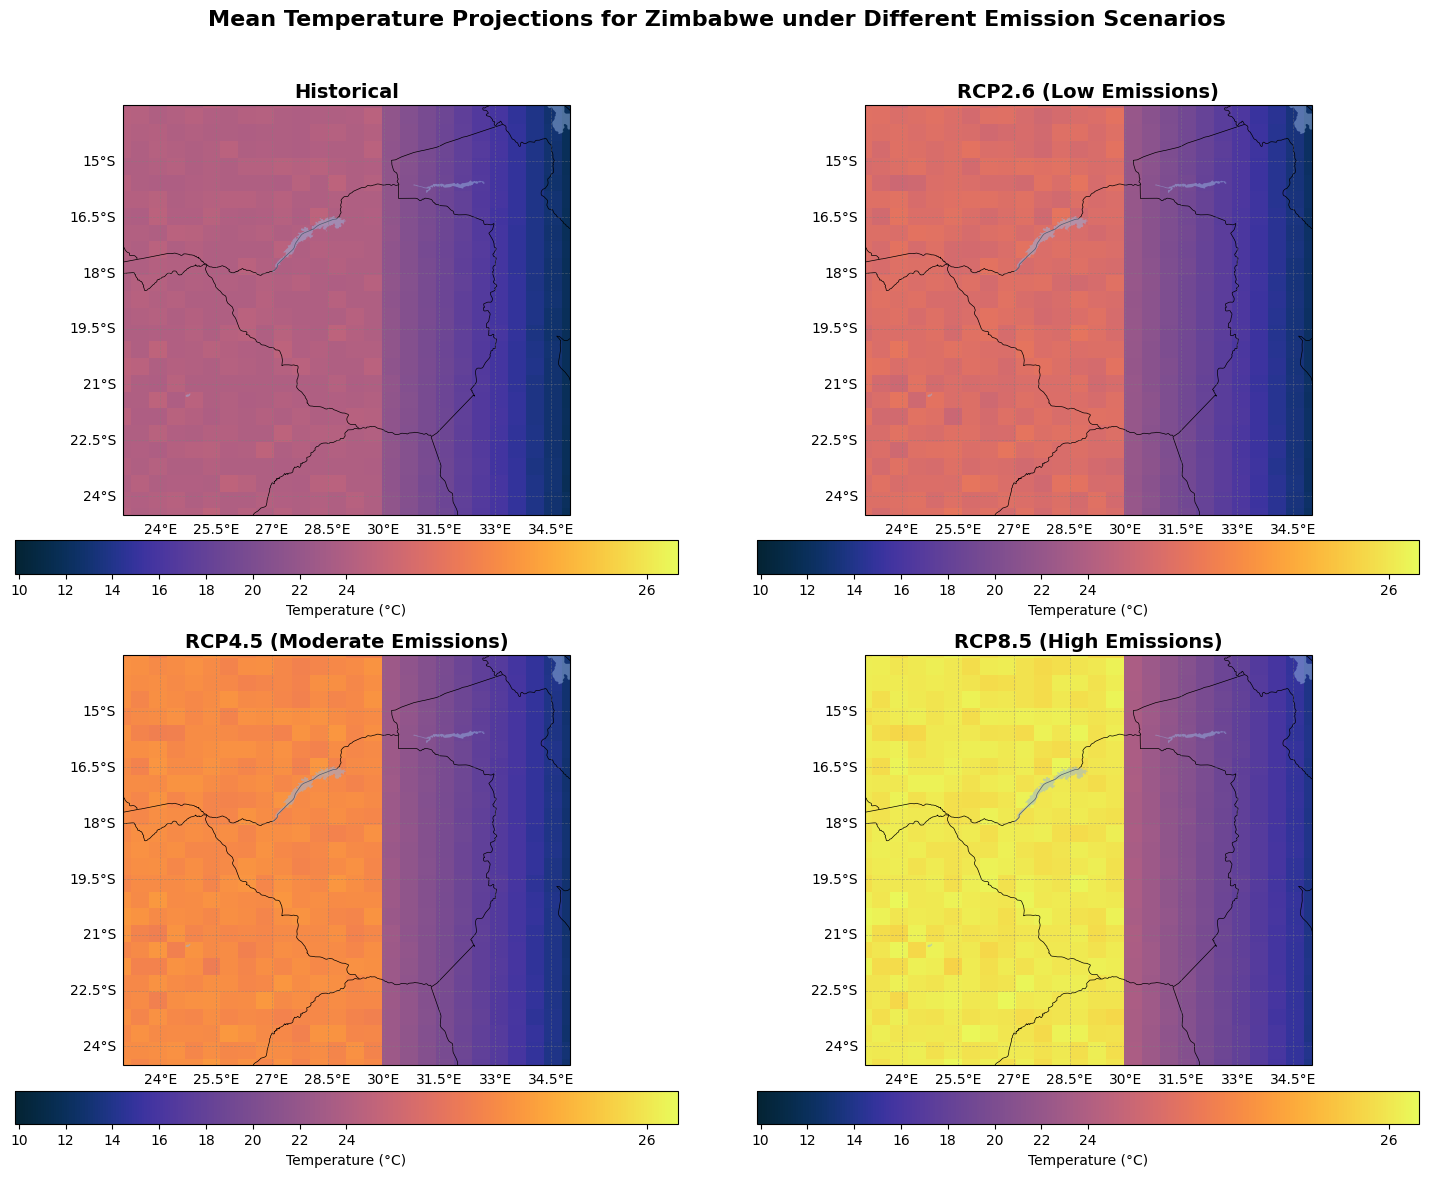

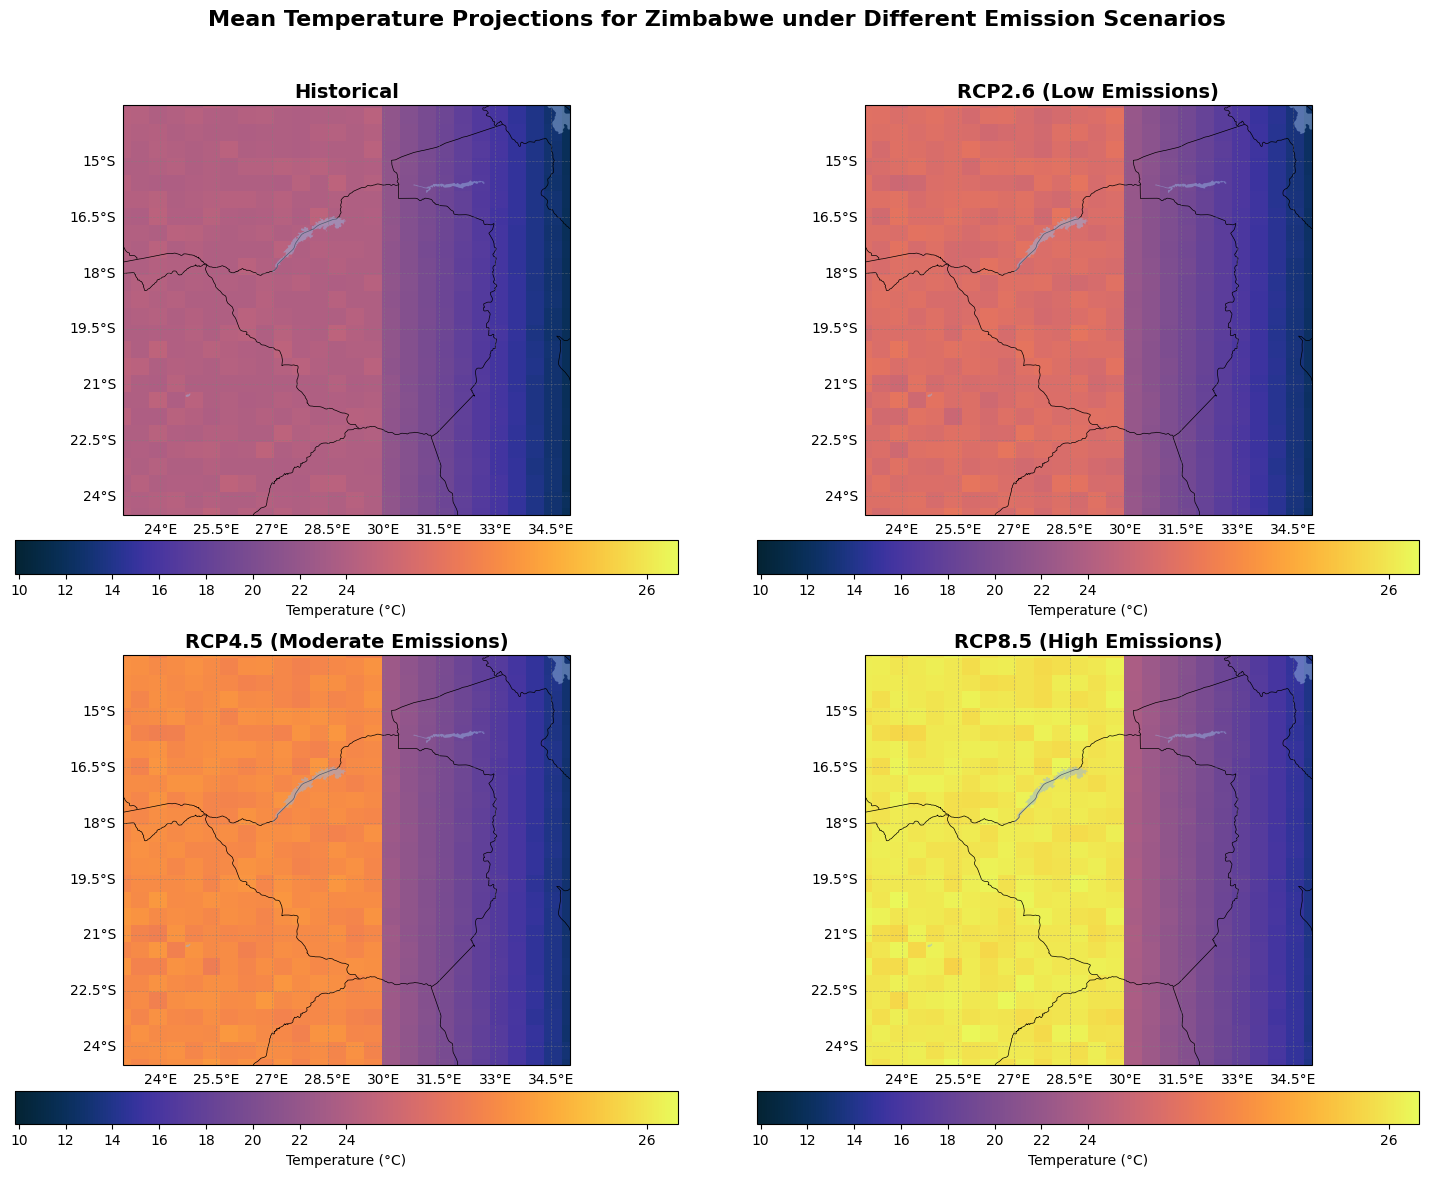

In [30]:
# Plot the temperature maps from our model
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import cmocean

def plot_temperature_maps(datasets, scenarios, zimbabwe_bounds):
    """
    Plot temperature maps for different emission scenarios.
    """
    # Create figure with subplots for each scenario
    fig = plt.figure(figsize=(16, 12))
    
    # Define projection
    projection = ccrs.PlateCarree()
    
    # Calculate the mean temperature for the entire period for each scenario
    scenario_means = {}
    temp_min = float('inf')
    temp_max = float('-inf')
    
    for scenario_id, ds in datasets.items():
        # Calculate mean over all time
        temp_mean = ds.tas.mean(dim='time')
        scenario_means[scenario_id] = temp_mean
        
        # Update global min and max
        temp_min = min(temp_min, float(temp_mean.min()))
        temp_max = max(temp_max, float(temp_mean.max()))
    
    # Process each scenario
    for i, (scenario_id, scenario_info) in enumerate(scenarios.items()):
        # Skip if scenario not in datasets
        if scenario_id not in datasets:
            continue
            
        # Get mean temperature for this scenario
        temp_mean = scenario_means[scenario_id]
        
        # Create subplot
        ax = fig.add_subplot(2, 2, i+1, projection=projection)
        
        # Set title
        ax.set_title(f"{scenario_info['name']}", fontsize=14, fontweight='bold')
        
        # Add coastlines, borders, and other features
        ax.coastlines(resolution='50m', linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        
        # Highlight Zimbabwe
        if zimbabwe_bounds:
            ax.set_extent([
                zimbabwe_bounds['lon_min'] - 2, 
                zimbabwe_bounds['lon_max'] + 2,
                zimbabwe_bounds['lat_min'] - 2, 
                zimbabwe_bounds['lat_max'] + 2
            ], crs=projection)
            
            # Draw rectangle around Zimbabwe
            import matplotlib.patches as mpatches
            zimbabwe_box = mpatches.Rectangle(
                (zimbabwe_bounds['lon_min'], zimbabwe_bounds['lat_min']),
                zimbabwe_bounds['lon_max'] - zimbabwe_bounds['lon_min'],
                zimbabwe_bounds['lat_max'] - zimbabwe_bounds['lat_min'],
                linewidth=2, edgecolor='black', facecolor='none',
                transform=projection
            )
            ax.add_patch(zimbabwe_box)
        
        # Create a colormap centered at a reference temperature (e.g., 24°C)
        center = 24
        norm = TwoSlopeNorm(vmin=temp_min, vcenter=center, vmax=temp_max)
        
        # Plot temperature map
        im = ax.pcolormesh(
            temp_mean.lon, temp_mean.lat, temp_mean, 
            transform=projection,
            norm=norm,
            cmap=cmocean.cm.thermal,
            shading='auto'
        )
        
        # Add gridlines
        gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
        cbar.set_label('Temperature (°C)', fontsize=10)
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle('Mean Temperature Projections for Zimbabwe under Different Emission Scenarios', 
                 fontsize=16, fontweight='bold')
    
    plt.show()
    return fig

# Get the data we created earlier
datasets, scenarios, zimbabwe_bounds = create_sample_temperature_data()

# Plot the temperature maps
plot_temperature_maps(datasets, scenarios, zimbabwe_bounds)

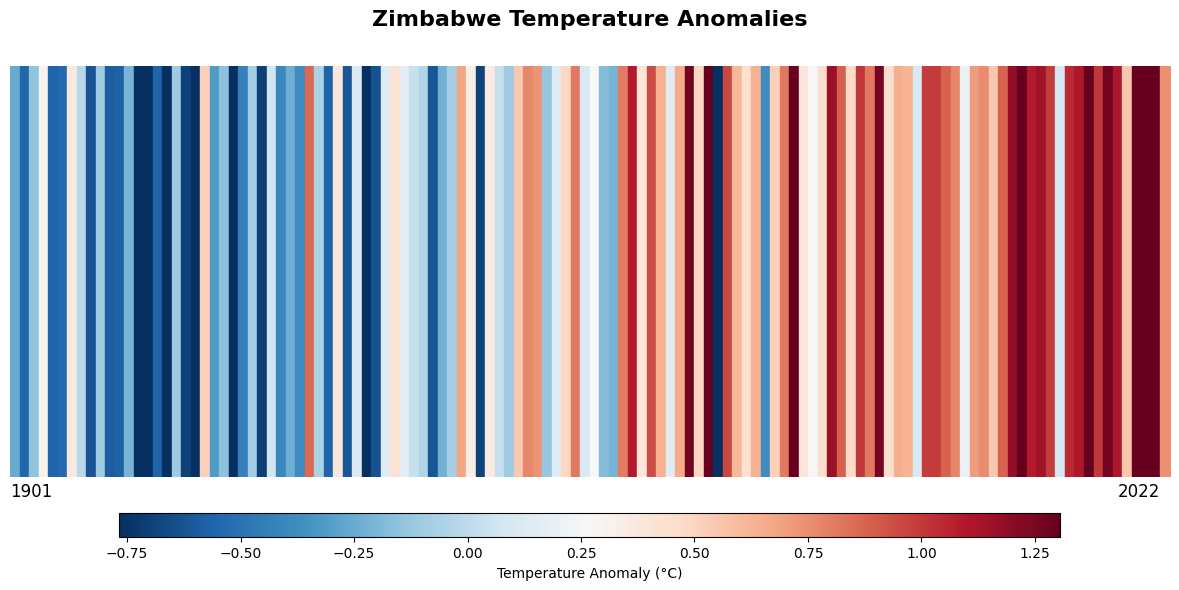

In [35]:
# The beginning of your code seems to be cut off, so I'll start from where it's visible
try:
    # Your code to fetch data would be here
    pass
except:
    # Simulate Zimbabwe temperature anomaly data from 1901 to 2022
    # Based on general warming trends in Southern Africa
    years = np.arange(1901, 2023)
    
    # Create realistic temperature anomalies with warming trend
    np.random.seed(42)  # For reproducibility
    base_anomalies = np.random.normal(0, 0.5, len(years))  # Natural variability
    trend = np.linspace(-0.5, 1.2, len(years))  # Warming trend
    anomalies = base_anomalies + trend

# Create the Ed Hawkins color scale
# Using the specific colors from the #ShowYourStripes project
# Blues for cool, reds for warm
colors_hawkins = [
    '#053061', '#2166ac', '#4393c3', '#92c5de', '#d1e5f0',
    '#f7f7f7',  # Center (white)
    '#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f'
]

# Create a custom colormap
cmap_hawkins = mpl.colors.LinearSegmentedColormap.from_list("warming_stripes", colors_hawkins)

# Normalize the data for color mapping
# Find the 5th and 95th percentiles for robust color scaling
vmin, vmax = np.percentile(anomalies, [5, 95])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Create the warming stripes plot
fig, ax = plt.subplots(figsize=(12, 6))  # Create figure and axes explicitly

# Plot each year as a colored stripe
for i, year in enumerate(years):
    ax.fill_betweenx([0, 1], i, i+1, color=cmap_hawkins(norm(anomalies[i])))

# Remove axes and spines for clean look
ax.set_ylim(0, 1)
ax.set_xlim(0, len(years))
ax.axis('off')

# Add title and years
ax.text(len(years)/2, 1.1, "Zimbabwe Temperature Anomalies", 
       ha='center', fontsize=16, fontweight='bold')
ax.text(0, -0.05, f"{years[0]}", ha='left', fontsize=12)
ax.text(len(years)-1, -0.05, f"{years[-1]}", ha='right', fontsize=12)

# Add a small colorbar at the bottom
# Pass the ax parameter to the colorbar function
sm = plt.cm.ScalarMappable(cmap=cmap_hawkins, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.08, aspect=40)
cbar.set_label('Temperature Anomaly (°C)', fontsize=10)

plt.tight_layout()
plt.show()